# AI Driven Loan Approval Prediction System

**Module:** CU6051NI - Artificial Intelligence

**Student Name:** Prajol Bimali

**London Met ID:** 23048651

**College ID:** np01ai4a230099

## Project Overview
This notebook contains the complete implementation of a Text Classification System designed to predict Loan Approval

### **Loading Dataset**

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/master-loan-approval-data.csv")
df.head()

,Age,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Loan_Purpose,Debt_to_Income_Ratio,Loan_Status
0,50,Salaried,110000,780,35000,72,Debt_Consolidation,0.22,Approved
1,27,Self-Employed,35000,560,20000,48,Debt_Consolidation,0.62,Denied
2,51,Self-Employed,210000,810,80000,120,Business,0.25,Approved
3,20,Student,8000,570,5000,24,Education,0.45,Denied
4,38,Salaried,92000,710,22000,48,Debt_Consolidation,0.29,Approved


### **Class Distribution**

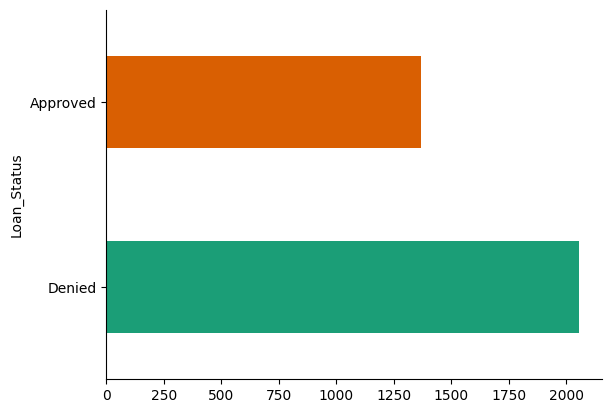

In [77]:
# Loan status Distribution

ax = df.groupby('Loan_Status').size().plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2')
)

ax.set_yticks([0, 1])
ax.set_yticklabels(['Denied', 'Approved'])

ax.spines[['top', 'right']].set_visible(False)
plt.show()


### **Distribution of Loan Purposes**

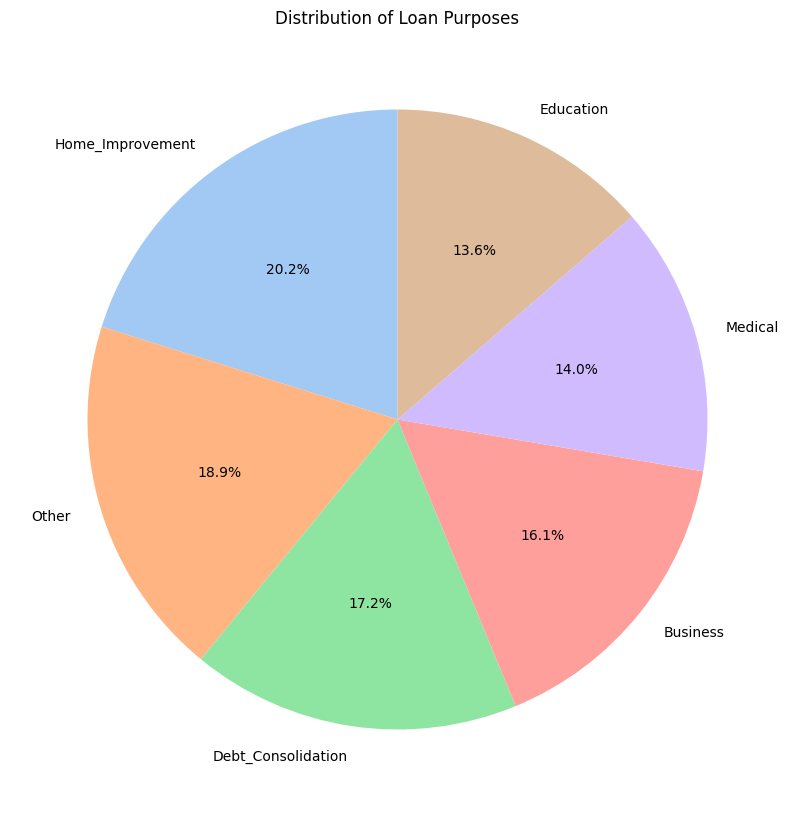

In [78]:
# Count the occurrences of each loan purpose
loan_purpose_counts = df['Loan_Purpose'].value_counts()

plt.figure(figsize=(10, 12))
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Loan Purposes')
plt.show()

In [79]:
# checked null value and the dataset has no missing or null values
df.isnull().sum()

,0
Age,0
Employment_Type,0
Annual_Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term_Months,0
Loan_Purpose,0
Debt_to_Income_Ratio,0
Loan_Status,0


In [80]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 72


In [81]:
# dropped duplicate rows
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after dropping duplicates: {df.shape}")

DataFrame shape after dropping duplicates: (3350, 9)


### **Data Preprocessing**

In [82]:
#LABEL ENCODING
df['Loan_Status'] = df['Loan_Status'].map({'Approved': 1, 'Denied': 0})
print(df['Loan_Status'].value_counts())

Loan_Status
1    2002
0    1348
Name: count, dtype: int64


In [83]:
# df = pd.get_dummies(df, columns=['Employment_Type', 'Loan_Purpose'], drop_first=True).astype(int)  for binary
df = pd.get_dummies(df, columns=['Employment_Type', 'Loan_Purpose'], drop_first=True) # encodes in true and false i.e. Boolean as boolean is memory efficient.
display(df.head())

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Debt_to_Income_Ratio,Loan_Status,Employment_Type_Self-Employed,Employment_Type_Student,Employment_Type_Unemployed,Loan_Purpose_Debt_Consolidation,Loan_Purpose_Education,Loan_Purpose_Home_Improvement,Loan_Purpose_Medical,Loan_Purpose_Other
0,50,110000,780,35000,72,0.22,1,False,False,False,True,False,False,False,False
1,27,35000,560,20000,48,0.62,0,True,False,False,True,False,False,False,False
2,51,210000,810,80000,120,0.25,1,True,False,False,False,False,False,False,False
3,20,8000,570,5000,24,0.45,0,False,True,False,False,True,False,False,False
4,38,92000,710,22000,48,0.29,1,False,False,False,True,False,False,False,False


In [84]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling excluding the target 'Loan_Status' and one-hot encoded columns which are already binary
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Loan_Status' from numerical columns if it's there, as it's the target variable
if 'Loan_Status' in numerical_cols:
    numerical_cols.remove('Loan_Status')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Debt_to_Income_Ratio,Loan_Status,Employment_Type_Self-Employed,Employment_Type_Student,Employment_Type_Unemployed,Loan_Purpose_Debt_Consolidation,Loan_Purpose_Education,Loan_Purpose_Home_Improvement,Loan_Purpose_Medical,Loan_Purpose_Other
0,0.583636,0.768390,0.982858,0.161505,0.502902,-0.785425,1,False,False,False,True,False,False,False,False
1,-1.082443,-0.632460,-0.826290,-0.299067,-0.256210,1.239839,0,True,False,False,True,False,False,False,False
2,0.656074,2.636190,1.229560,1.543219,2.021126,-0.633530,1,True,False,False,False,False,False,False,False
3,-1.589511,-1.136766,-0.744056,-0.759638,-1.015322,0.379102,0,False,True,False,False,True,False,False,False
4,-0.285623,0.432186,0.407220,-0.237657,-0.256210,-0.431003,1,False,False,False,True,False,False,False,False


In [85]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

print("Head of X (Features):")
display(X.head())

print("\nHead of Y (Target):")
display(Y.head())

Head of X (Features):


,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term_Months,Debt_to_Income_Ratio,Employment_Type_Self-Employed,Employment_Type_Student,Employment_Type_Unemployed,Loan_Purpose_Debt_Consolidation,Loan_Purpose_Education,Loan_Purpose_Home_Improvement,Loan_Purpose_Medical,Loan_Purpose_Other
0,0.583636,0.768390,0.982858,0.161505,0.502902,-0.785425,False,False,False,True,False,False,False,False
1,-1.082443,-0.632460,-0.826290,-0.299067,-0.256210,1.239839,True,False,False,True,False,False,False,False
2,0.656074,2.636190,1.229560,1.543219,2.021126,-0.633530,True,False,False,False,False,False,False,False
3,-1.589511,-1.136766,-0.744056,-0.759638,-1.015322,0.379102,False,True,False,False,True,False,False,False
4,-0.285623,0.432186,0.407220,-0.237657,-0.256210,-0.431003,False,False,False,True,False,False,False,False



Head of Y (Target):


,Loan_Status
0,1
1,0
2,1
3,0
4,1


### **Train Test Split**

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2680, 14)
X_test shape: (670, 14)
Y_train shape: (2680,)
Y_test shape: (670,)


### **Imports for Models**

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

### **Traditional Machine Learning Models**

In [88]:
lr = LogisticRegression(random_state=42, solver='liblinear')
rf = RandomForestClassifier(random_state=42, n_estimators=100)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)

lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)


### **Neural Network (MLP)**

In [89]:
# Architecture
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevents overfitting
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output (0 to 1)
])

# Compile
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Training Neural Network...")
history = model_nn.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict (Convert probabilities to class labels 0 or 1)
nn_probs = model_nn.predict(X_test)
nn_preds = (nn_probs > 0.5).astype(int).flatten()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network...
Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6412 - loss: 0.6273 - val_accuracy: 0.8791 - val_loss: 0.3793
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8790 - loss: 0.3512 - val_accuracy: 0.9149 - val_loss: 0.2393
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9065 - loss: 0.2361 - val_accuracy: 0.9254 - val_loss: 0.1945
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9340 - loss: 0.1773 - val_accuracy: 0.9358 - val_loss: 0.1815
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9250 - loss: 0.1753 - val_accuracy: 0.9313 - val_loss: 0.1830
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9285 - loss: 0.1637 - val_accuracy: 0.9373 - val_loss: 0.1754
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9357 - loss: 0.1570 - val_accuracy: 0.9328 - val_loss: 0.1756
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9364 - loss: 0.15

### **MODEL EVALUATION**

In [90]:
# Evaluation
print("\nNeural Network Results")
print(f"  Accuracy  : {accuracy_score(Y_test, nn_preds):.4f}")
print(f"  Precision : {precision_score(Y_test, nn_preds):.4f}")
print(f"  Recall    : {recall_score(Y_test, nn_preds):.4f}")
print(f"  F1 Score  : {f1_score(Y_test, nn_preds):.4f}")

print("\nLogistic Regression Results")
print(f"  Accuracy  : {accuracy_score(Y_test, lr_preds):.4f}")
print(f"  Precision : {precision_score(Y_test, lr_preds):.4f}")
print(f"  Recall    : {recall_score(Y_test, lr_preds):.4f}")
print(f"  F1 Score  : {f1_score(Y_test, lr_preds):.4f}")

print("\nRandom Forest Results")
print(f"  Accuracy  : {accuracy_score(Y_test, rf_preds):.4f}")
print(f"  Precision : {precision_score(Y_test, rf_preds):.4f}")
print(f"  Recall    : {recall_score(Y_test, rf_preds):.4f}")
print(f"  F1 Score  : {f1_score(Y_test, rf_preds):.4f}")

print("\nXGBoost Results")
print(f"  Accuracy  : {accuracy_score(Y_test, xgb_preds):.4f}")
print(f"  Precision : {precision_score(Y_test, xgb_preds):.4f}")
print(f"  Recall    : {recall_score(Y_test, xgb_preds):.4f}")
print(f"  F1 Score  : {f1_score(Y_test, xgb_preds):.4f}")


Neural Network Results
  Accuracy  : 0.9388
  Precision : 0.9389
  Recall    : 0.9600
  F1 Score  : 0.9493

Logistic Regression Results
  Accuracy  : 0.9328
  Precision : 0.9298
  Recall    : 0.9600
  F1 Score  : 0.9446

Random Forest Results
  Accuracy  : 0.9433
  Precision : 0.9571
  Recall    : 0.9475
  F1 Score  : 0.9523

XGBoost Results
  Accuracy  : 0.9284
  Precision : 0.9422
  Recall    : 0.9375
  F1 Score  : 0.9398


### **MLP Training History Loss & Accuracy Visualization**

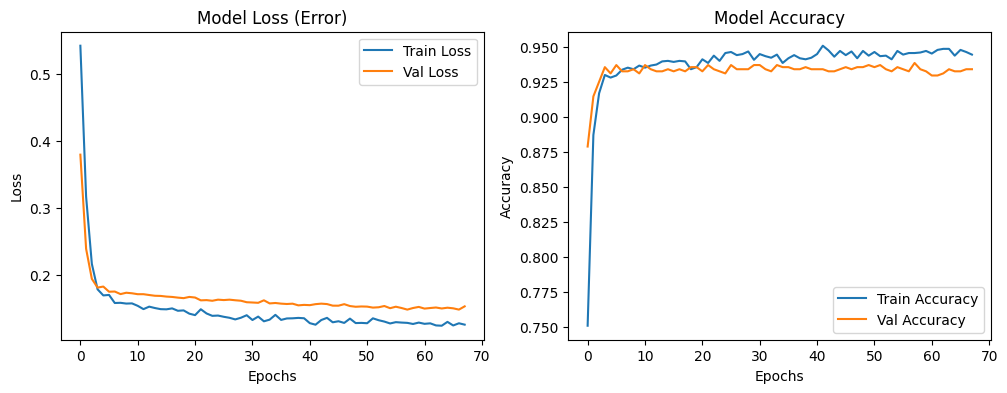

In [91]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (Error)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### **Cross Validation of ML Models**

In [92]:

# Cross-validation

# Not doing cv for MLP because on scale running CV 5 times might be too computationally expensive

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_cv = cross_val_score(lr, X, Y, cv=skf, scoring='accuracy')
rf_cv = cross_val_score(rf, X, Y, cv=skf, scoring='accuracy')
xgb_cv = cross_val_score(xgb, X, Y, cv=skf, scoring='accuracy')

print("\nCross-Validation Accuracy (5-Fold)")
print(f"Logistic Regression : {lr_cv.mean():.4f} Standard Deviation {lr_cv.std():.4f}")
print(f"Random Forest       : {rf_cv.mean():.4f} Standard Deviation {rf_cv.std():.4f}")
print(f"XGBoost             : {xgb_cv.mean():.4f} Standard Deviation {xgb_cv.std():.4f}")


Cross-Validation Accuracy (5-Fold)
Logistic Regression : 0.9355 Standard Deviation 0.0091
Random Forest       : 0.9487 Standard Deviation 0.0079
XGBoost             : 0.9409 Standard Deviation 0.0075


### **ML Models Confusion Matrix**

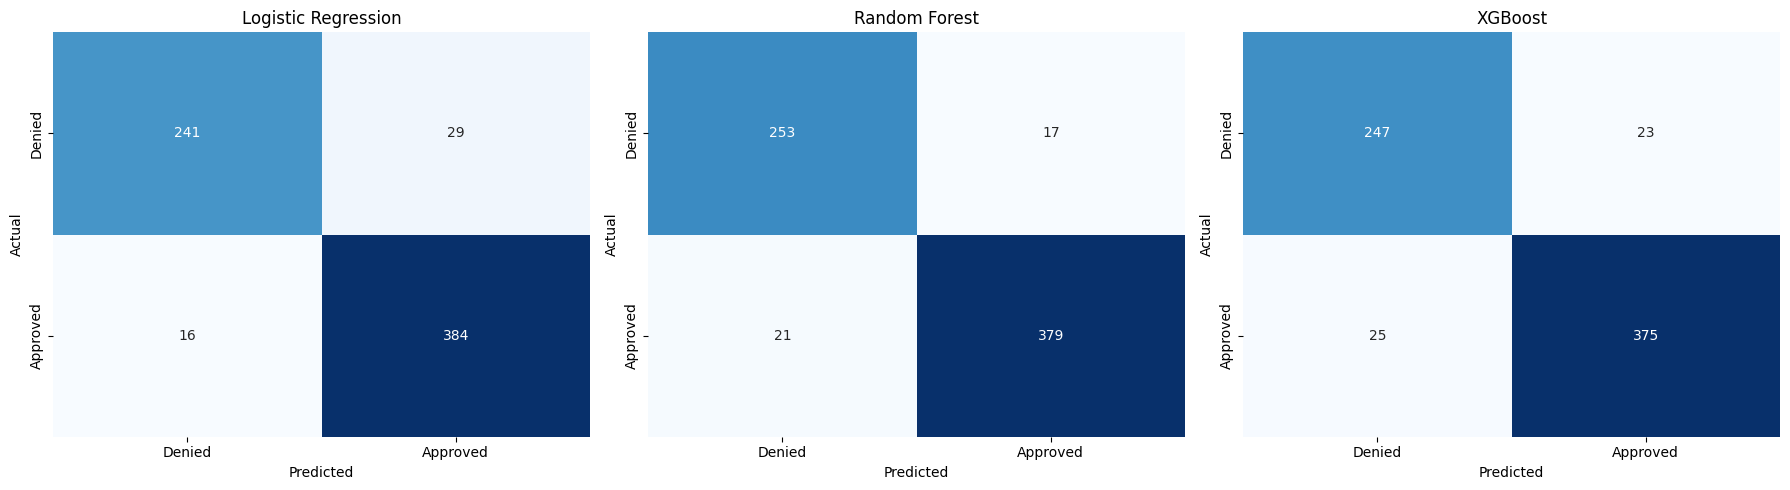

In [93]:
from sklearn.metrics import confusion_matrix

# Confusion matrices
lr_cm = confusion_matrix(Y_test, lr_preds)
rf_cm = confusion_matrix(Y_test, rf_preds)
xgb_cm = confusion_matrix(Y_test, xgb_preds)

labels = ['Denied', 'Approved']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### **Neural Network Confusion Matrix**

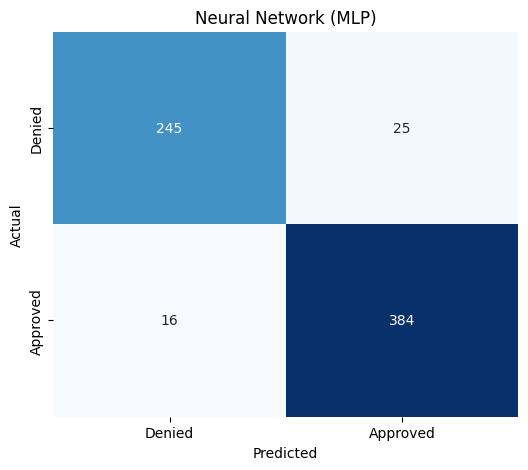

In [94]:
plt.figure(figsize=(6, 5))
nn_cm = confusion_matrix(Y_test, nn_preds)

sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Neural Network (MLP)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **ROC Curves for all Models**

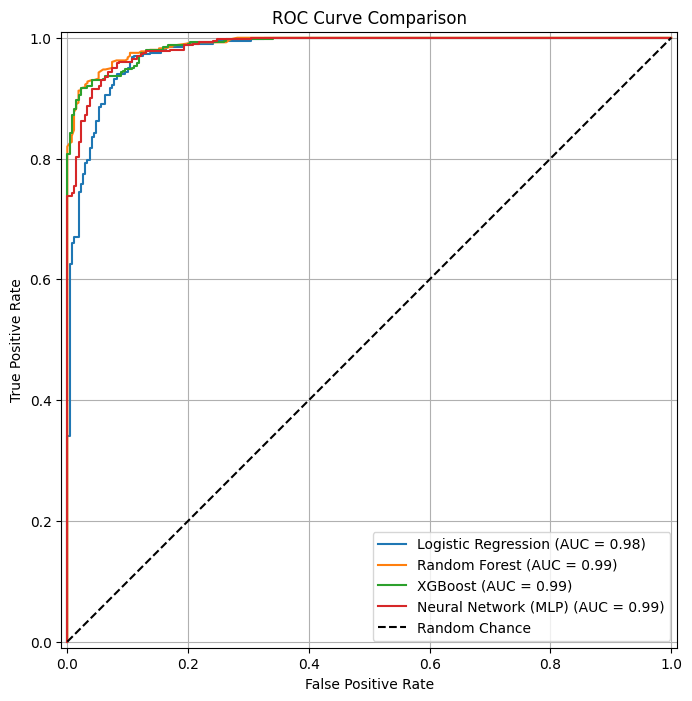

In [95]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

RocCurveDisplay.from_estimator(lr, X_test, Y_test, name='Logistic Regression', ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, Y_test, name='Random Forest', ax=ax)
RocCurveDisplay.from_estimator(xgb, X_test, Y_test, name='XGBoost', ax=ax)


# Predict probabilities for the Neural Network.
# Keras returns a 2D array (e.g. [[0.8], [0.1]]), but Scikit-Learn metrics expect a flat 1D array.
# used .ravel() to flatten the shape (e.g. [0.8, 0.1]) so the ROC function accepts it.
nn_probs = model_nn.predict(X_test, verbose=0).ravel()

RocCurveDisplay.from_predictions(Y_test, nn_probs, name='Neural Network (MLP)', ax=ax)

ax.plot([0, 1], [0, 1], 'k--', label='Random Chance')
ax.set_title('ROC Curve Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.grid(True)

plt.show()

### **MODELS IN ACTION**

In [98]:
print("LIVE LOAN PREDICTION TERMINAL")

print("\nValid Job Types: Salaried, Self-Employed, Student, Unemployed")
print("Valid Purposes:  Debt_Consolidation, Business, Education, Medical, Home_Improvement, Other")

try:
    data = {
        'Age': [int(input("\n1. Age: "))],
        'Employment_Type': [input("2. Job Type: ").strip().title()],
        'Annual_Income': [float(input("3. Annual Income: "))],
        'Credit_Score': [int(input("4. Credit Score: "))],
        'Loan_Amount': [float(input("5. Loan Amount: "))],
        'Loan_Term_Months': [int(input("6. Term (Months): "))],
        'Loan_Purpose': [input("7. Purpose: ").strip().title()]
    }

    # Calculate DTI
    debt = float(input("8. Total Monthly Debt Payments: "))
    income = data['Annual_Income'][0]
    data['Debt_to_Income_Ratio'] = [(debt * 12) / income] if income > 0 else [100.0]

    # PROCESSING
    new_df = pd.get_dummies(pd.DataFrame(data)).reindex(columns=X.columns, fill_value=0)
    new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])



    print(" Live Prediction ")

    # predictions
    res_lr = "APPROVED" if lr.predict(new_df)[0] == 1 else "DENIED"
    res_rf = "APPROVED" if rf.predict(new_df)[0] == 1 else "DENIED"
    res_xgb = "APPROVED" if xgb.predict(new_df)[0] == 1 else "DENIED"

    # NN Prediction
    # verbose=0 to hide the progress bar.
    # [0][0] extracts the single float value from the result array.
    nn_prob = model_nn.predict(new_df, verbose=0)[0][0]
    res_nn = "APPROVED" if nn_prob > 0.5 else "DENIED"

    print(f"Logistic Regression : {res_lr}")
    print(f"Random Forest       : {res_rf}")
    print(f"XGBoost             : {res_xgb}")
    print(f"Neural Network      : {res_nn}")

except ValueError:
    print("\n Please enter valid numbers.")

LIVE LOAN PREDICTION TERMINAL

Valid Job Types: Salaried, Self-Employed, Student, Unemployed
Valid Purposes:  Debt_Consolidation, Business, Education, Medical, Home_Improvement, Other

1. Age: 45
2. Job Type: Self-Employed
3. Annual Income: 2500000
4. Credit Score: 750
5. Loan Amount: 1500000
6. Term (Months): 18
7. Purpose: Business
8. Total Monthly Debt Payments: 45000
 Live Prediction 
Logistic Regression : APPROVED
Random Forest       : APPROVED
XGBoost             : APPROVED
Neural Network      : APPROVED


### **Export Model and Scaler PKL file**

In [97]:
import joblib

# Save the best model and scaler to files
joblib.dump(rf, 'loan_model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Both model and scaler are saved")

Both model and scaler are saved
